# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


***

## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 0. Выгрузка библиотек

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\yurol\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


***

# 1. Описание данных

In [2]:
# Загрузка данных в датафрейм
data = pd.read_csv('telecom_users.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


***

Посмотрим на содержимое данных

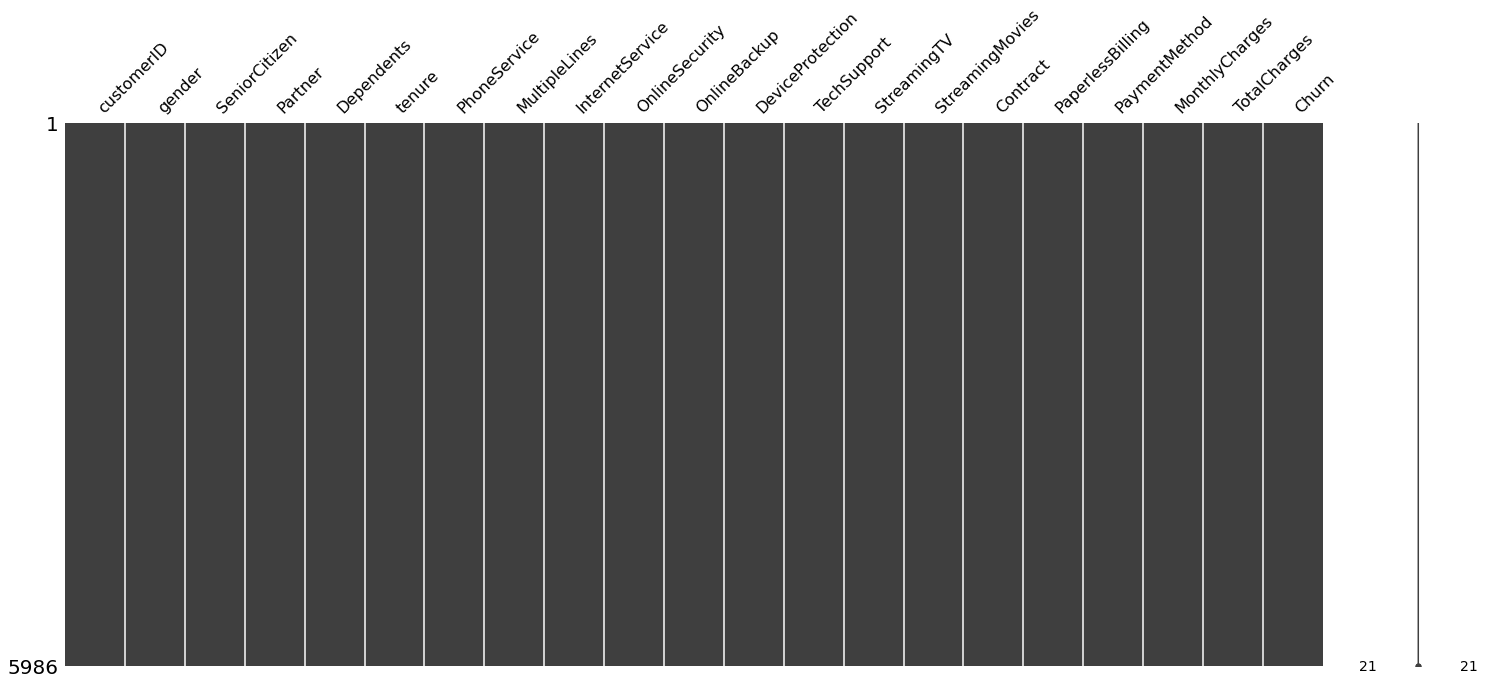

In [3]:
msno.matrix(data)
plt.show()

***

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


Как видно в данных нет пропусков, но тип данных по некоторым столбцам требует преобразования. <br>
Например данные по оплате и другие количественные данные.

In [5]:
data.describe(include='object') 

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5611,2
top,7450-NWRTR,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,10,4399


В данных нет дубликатов по ID клиента, в столбце **TotalCharges** есть пустые строки. <br>
<br>
Также можно отметить неоднородность данных (количество ушедших клиентов намного меньше)

In [6]:
# Преобразование в численный формат 'TotalCharges'
data['TotalCharges'] = data['TotalCharges'].apply(lambda x: float(x) if x != ' ' else 0)

data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,2294.221559
std,0.367909,24.516391,30.114702,2274.164124
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.650000,401.587500
50%,0.000000,29.000000,70.400000,1408.575000
75%,0.000000,56.000000,89.900000,3841.500000
max,1.000000,72.000000,118.750000,8684.800000


Произведена предобработка данных:<br>

* Удалены пропуски (пробельные значения);
* Данные проверены на наличие Nan;
* Выведены основные статистики;
* Посмотрены основные признаки и из каких значений они состоят.

***

# 2. Исследование зависимостей и формулирование гипотез

Исследуем зависимости между фичами и между фичами и целевым показателем.

### 2.1. Распределение по типу конракта.

Посмотрим зависимость между типом контракта и признаками: <br>
* Ежемесячное пополнение;
* Суммарное количество оплат;
* Продолжительность пребывание клиентом компании.<br>

Также посмотрим внутренне распределение признаков.

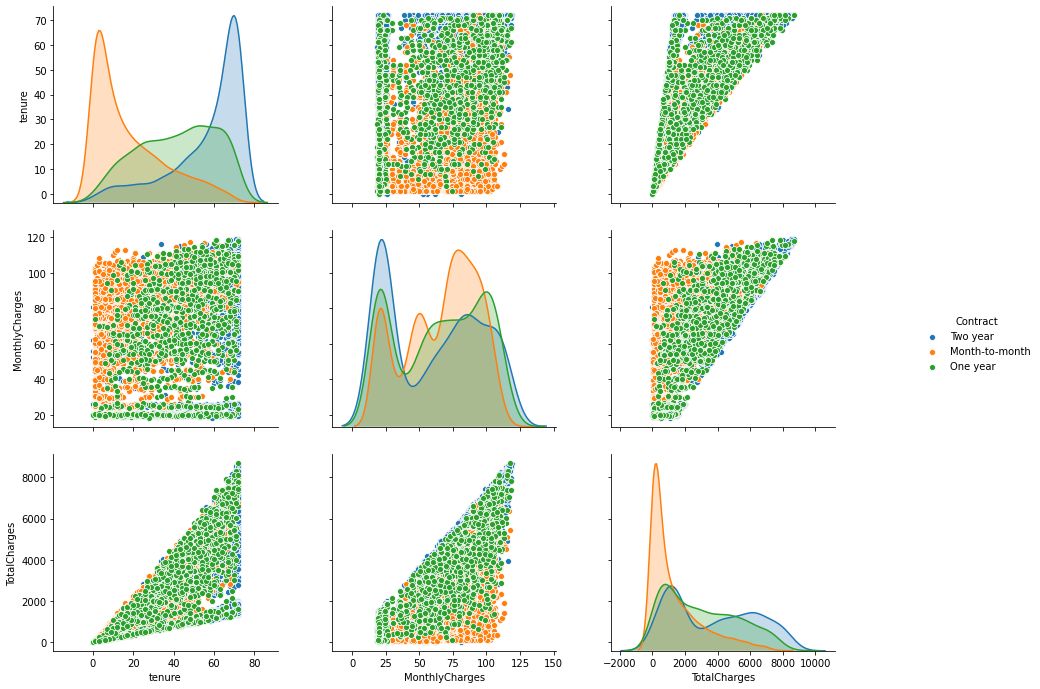

In [7]:
g = sns.pairplot(data[['Contract', 'tenure', 'MonthlyCharges', 'TotalCharges']], hue='Contract')
g.fig.set_size_inches(15,10)
plt.show()

Видно явную зависимость между сроком пребывания в компании и типом контракта:<br>
* Люди, недавно ставшие клиентами компании, в большинстве случаев предпочитают помесячные контракты;
* Люди, давно ставшие клиентами компании, в большинстве случаев предпочитают двухгодовые контракты;
* Между этими двумя группами, есть промежуточная, предпочитающая годовые контракты.<br>

По ежемесячной оплате достаточно ровное распределение в разрезе типа контракта.<br>
Явно видно разделение на две группы на каждом из тарифов.<br>
Возможно одна группа, с меньшими плата не использует интернет-сервисы.

### 2.2. Есть зависимость от интернет провайдера.

Посмотрим зависимость между интернет-провайдером и признаками: <br>
* Ежемесячное пополнение;
* Суммарное количество оплат;
* Продолжительность пребывание клиентом компании.<br>

Также посмотрим внутренне распределение признаков.

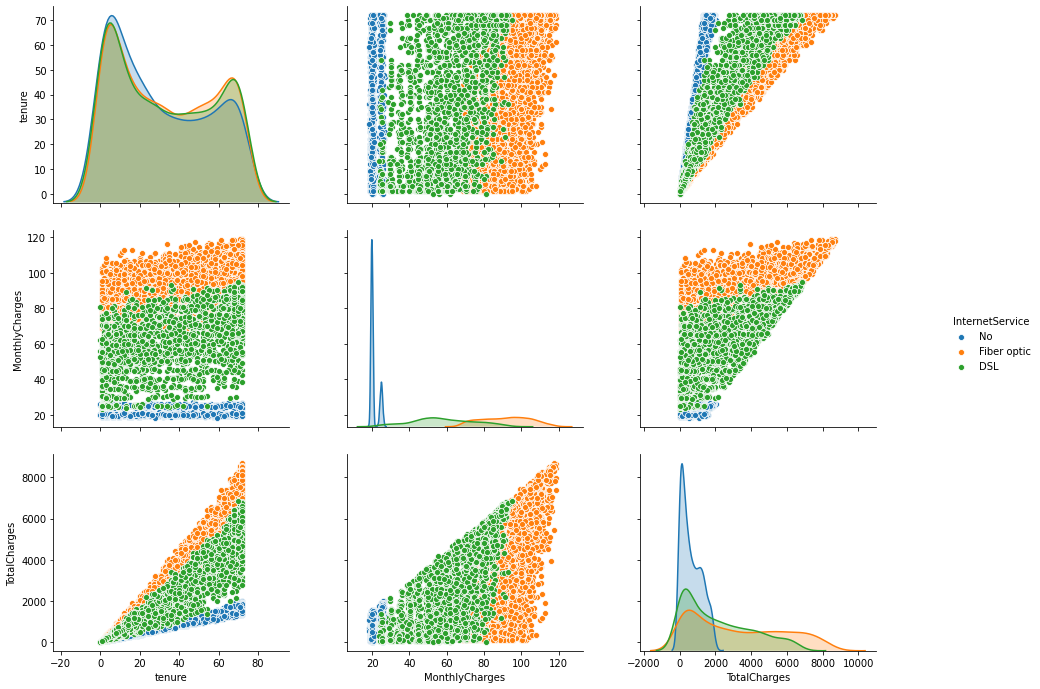

In [8]:
g = sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService']], hue='InternetService')
g.fig.set_size_inches(15,10)
plt.show()

Видно явную зависимость между платами за услуги и наличием интернет провайдера:<br>
* Самые малые платы у клиентов, без подключения к интернету;
* Вторая по стоимости компания провайдер DSL;
* Самый дорогой интернет провайдер Faber optic.<br>

Распределение по продолжительности пребывания в компании одинаковое по провайдерам.<br>

### 2.3. Влияние на отток размера платежей и продолжительности пользования услугами.

Посмотрим влияние на отток признаков: <br>
* Ежемесячное пополнение;
* Суммарное количество оплат;
* Продолжительность пребывание клиентом компании.<br>

Также посмотрим внутренне распределение признаков.

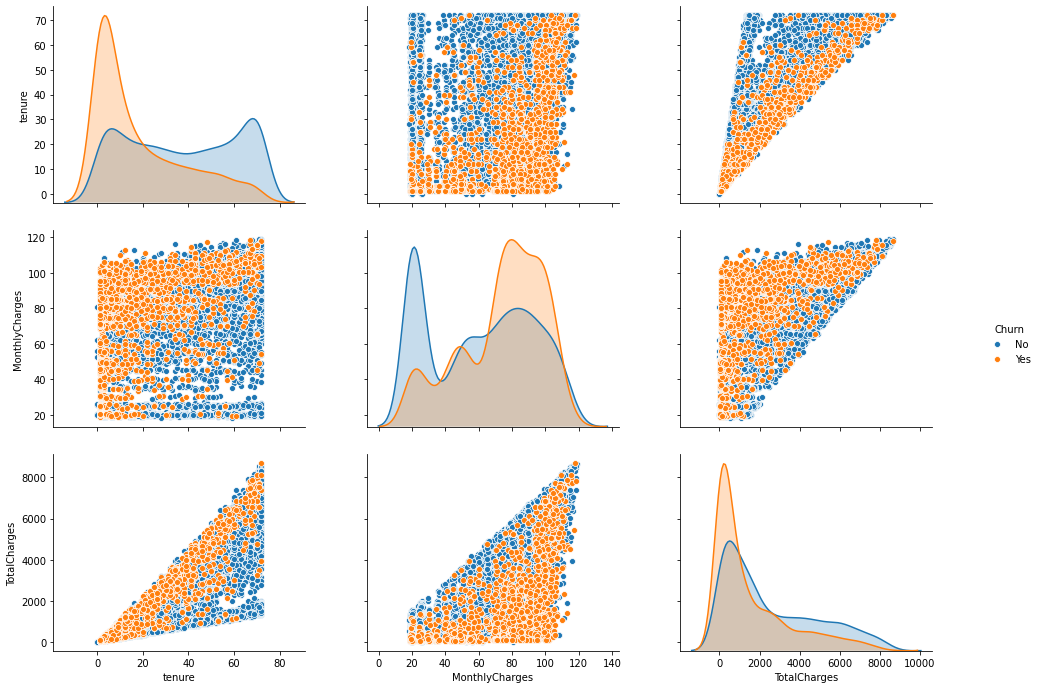

In [9]:
g = sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
g.fig.set_size_inches(15,10)
plt.show()

Можно отметить, что среди клиентов, решивших покинуть компанию, преобладающее число пользовались услугами недолго.<br>
Также в большом количестве случаев покинувшие компанию клиенты имели большой ежемесячный платёж, 
но суммарно они потратили меньше денег.<br>
Можно предположить, что этих клиентов не устроили тарифы компании. <br>
И они достаточнно рано перестали пользоваться услугами.<br>

### 2.4. Влияние на отток стоимости и продолжительности пребывания в компании.

Проверим зависимость между оттоком и признаками:
* Продолжительность пребывание в компании;
* Ежемесячное пополнение;
* Суммарные платежи.

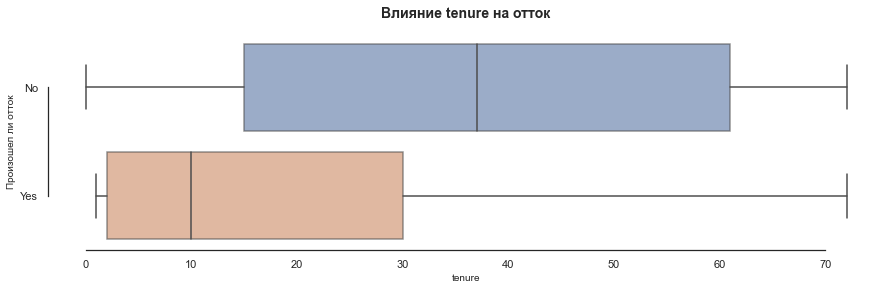

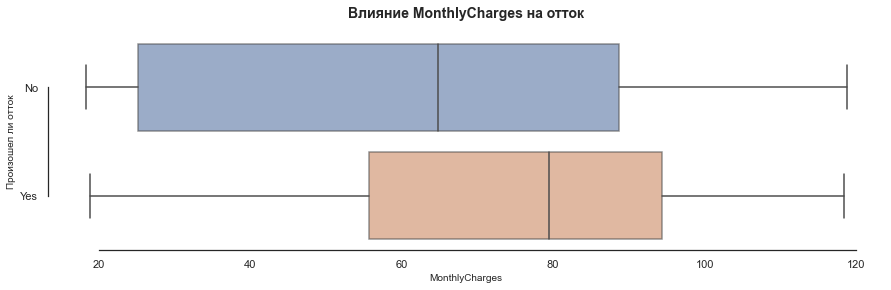

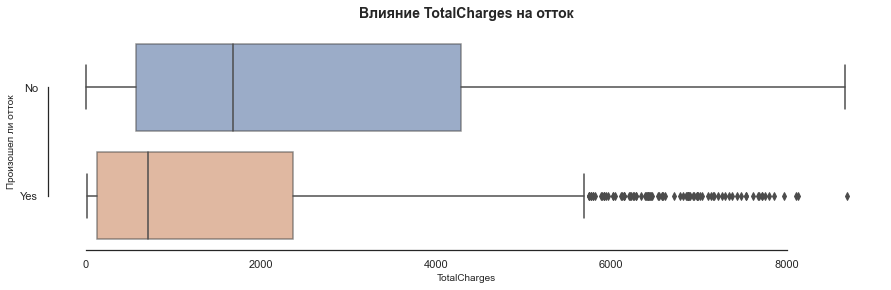

In [10]:
sns.set(style="white")
numeric_values = ['tenure', 'MonthlyCharges', 'TotalCharges']

for element in numeric_values:
    plt.subplots(figsize=(15, 4))
    sns.boxplot(x=element, y='Churn', data=data, boxprops=dict(alpha=.6))
    sns.despine(offset=0, trim=True)
    plt.xlabel(element, fontsize=10)
    plt.ylabel('Произошел ли отток', fontsize=10)
    plt.title(f'Влияние {element} на отток', fontsize=14, pad=15, fontweight='bold')
    plt.show()

Среди клиентов, есть большая часть ушедших людей, которая принесла компании много денег и давно пользуется услугами.<br>
Рассмотрим эту группу отдельно.

In [11]:
big_charge = data[data['Churn'] == 'Yes']['TotalCharges'].quantile(0.75)

data_rich = data[(data['TotalCharges'] > big_charge) & (data['Churn'] == 'Yes')]

In [12]:
data_rich.describe(include='object') 

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397
unique,397,2,2,2,2,3,2,2,2,2,2,2,2,3,2,4,1
top,8019-ENHXU,Male,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
freq,1,205,232,308,384,306,351,285,215,220,274,295,305,246,320,208,397


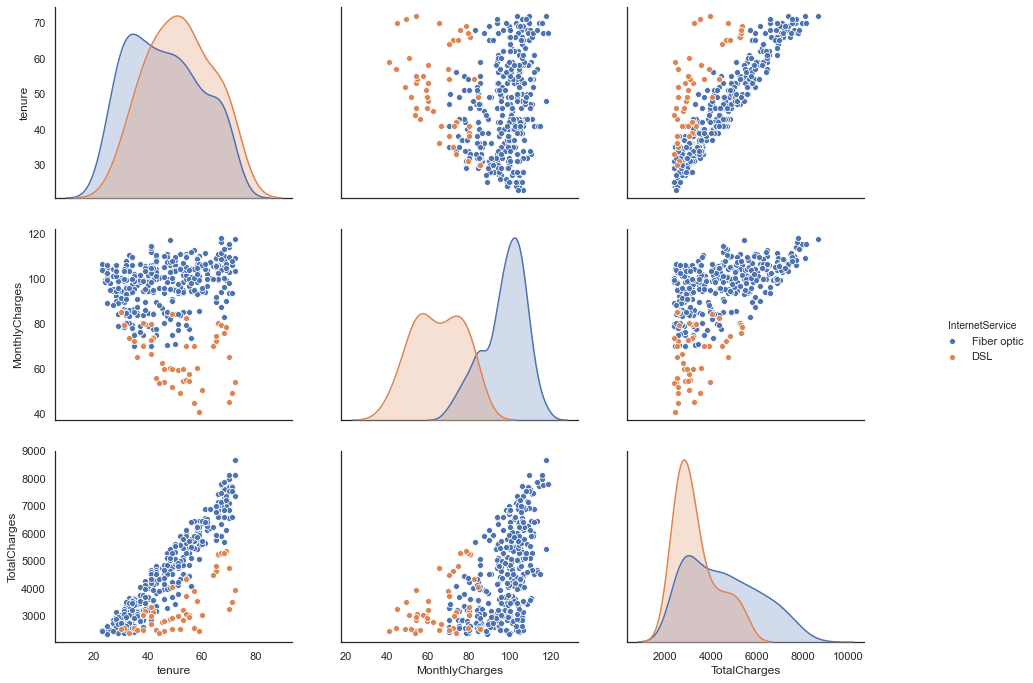

In [13]:
g = sns.pairplot(data_rich[['tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService']], hue='InternetService')
g.fig.set_size_inches(15,10)
plt.show()

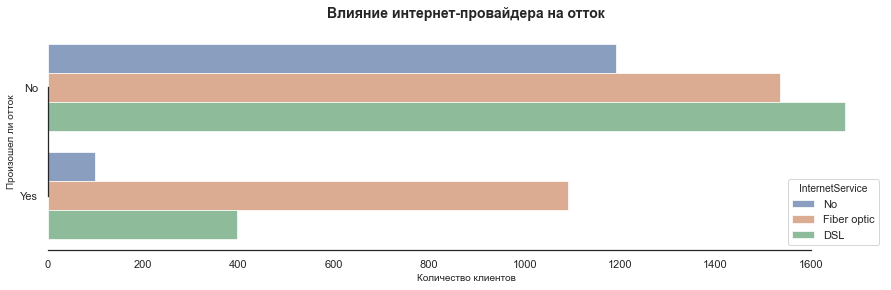

In [14]:
plt.subplots(figsize=(15, 4))
data['count'] = 1
sns.barplot(x='count', y='Churn', hue='InternetService', data=data, alpha=0.7, estimator=sum)
sns.despine(offset=0, trim=True)
plt.xlabel('Количество клиентов', fontsize=10)
plt.ylabel('Произошел ли отток', fontsize=10)
plt.title(f'Влияние интернет-провайдера на отток', fontsize=14, pad=15, fontweight='bold')
plt.show()

В подавляющем большинстве из этого пула людей, они пользуются услугами провайдера **Fiber optic**, возможно их неустраивают тарифы интернет-провайдера или качество связи или какие-то из услуг.

### 2.5. Влияние Fiber optic на отток.

Мы выявили явный дисбаланс:
* Клиенты **Fiber optic** занимают не самую большую долю;
* Клиенты **Fiber optic** более склонны к оттоку. <br>
<br>
Рассмотрим более внимательно клиентов fiber optic и попробуем понять, почему происходит отток.

Сделаем выборку всех ушедших клиентов, пользующихся интернетом.

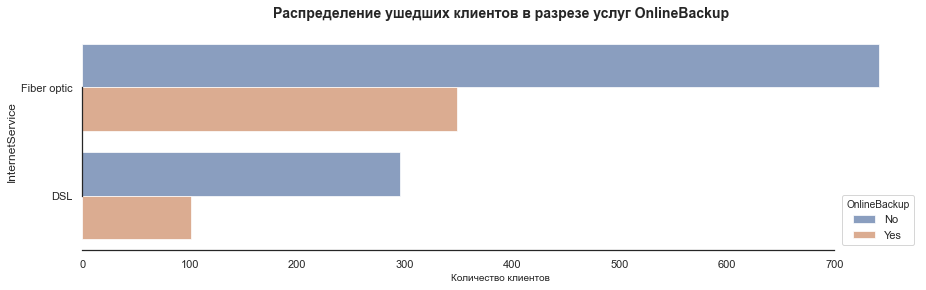

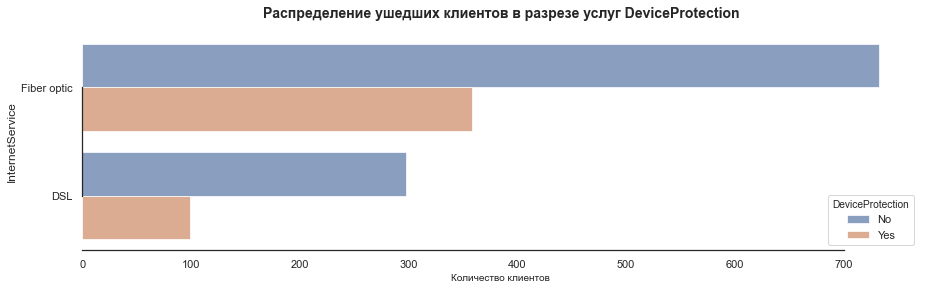

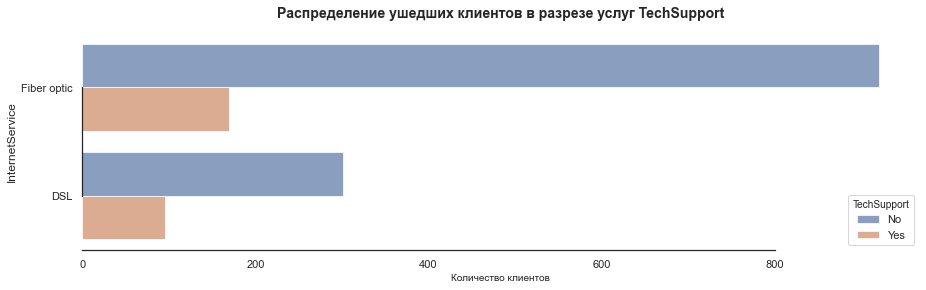

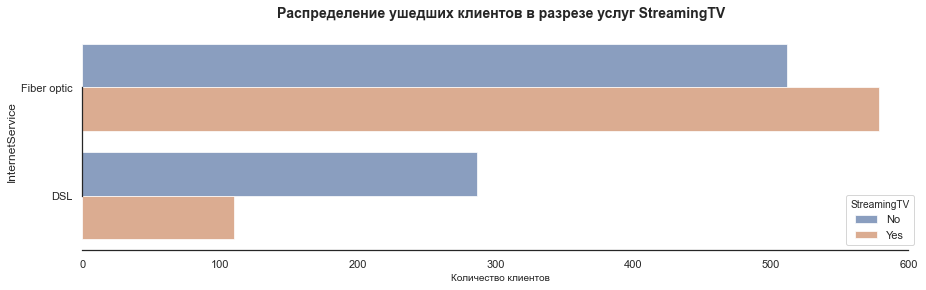

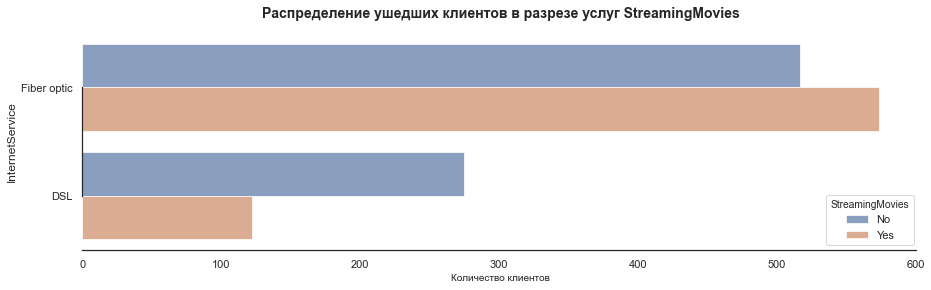

In [15]:
data_fiber_churned = data[(data['Churn'] == 'Yes') & (data['InternetService'] != 'No')]
internet_serv = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for serv in internet_serv:
    plt.subplots(figsize=(15, 4))
    
    sns.barplot(x='count', y='InternetService', hue=serv, data=data_fiber_churned, alpha=0.7, estimator=sum)
    sns.despine(offset=0, trim=True)
    plt.xlabel('Количество клиентов', fontsize=10)
    plt.title(f'Распределение ушедших клиентов в разрезе услуг {serv}', fontsize=14, pad=15, fontweight='bold')
    plt.show()

Можно сделать вывод, что клиентов провайдера **fiber optic** скорее не устраивают услуги стриминга.<br> 
Доля ушедших клиентов с подключенным стримингом, больше в сравнении с **DSL**. <br>
Проверим гипотизу и посмотрим как на общем уровне ведет себя распределение среди любителей стриминга.

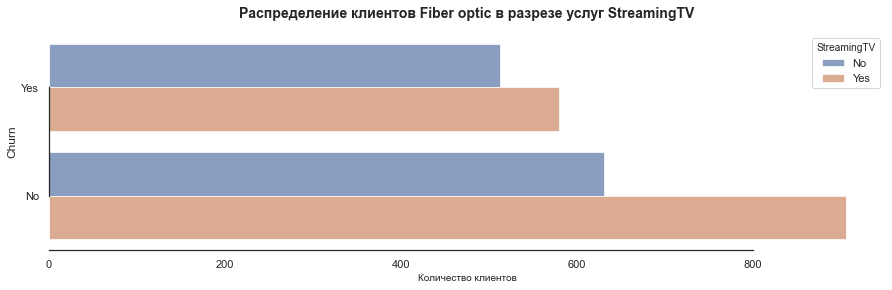

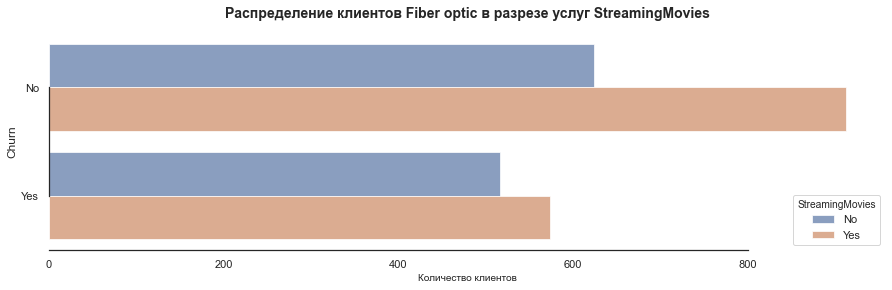

In [16]:
streaming_list = ['StreamingTV', 'StreamingMovies']

for serv in streaming_list:
    plt.subplots(figsize=(15, 4))   
    sns.barplot(x='count', y='Churn', hue=serv, 
                data=data[data['InternetService'] == 'Fiber optic'].sort_values(by=[serv]), 
                alpha=0.7, 
                estimator=sum)
    sns.despine(offset=0, trim=True)
    plt.xlabel('Количество клиентов', fontsize=10)
    plt.title(f'Распределение клиентов Fiber optic в разрезе услуг {serv}', fontsize=14, pad=15, fontweight='bold')
    plt.show()

Можно сказать, что гипотиза не состоялась.<br>
Клиенты fiber optic в равной степени пользуются стримингом, как ушедшие, так и нет.<br>

Проверим, влияет ли на отток мобильный сервис.

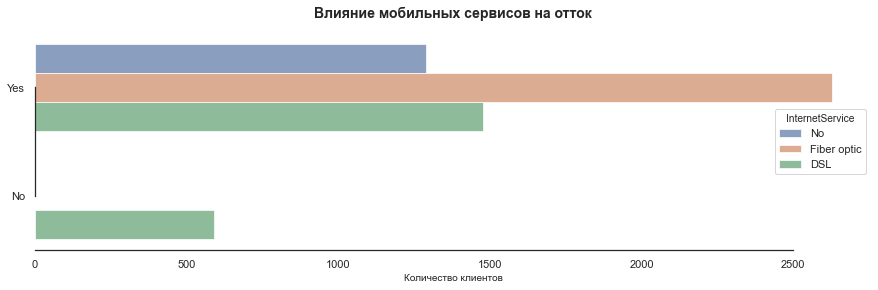

In [17]:
plt.subplots(figsize=(15, 4))
sns.barplot(x='count', y='PhoneService', hue='InternetService', data=data, alpha=0.7, estimator=sum)
sns.despine(offset=0, trim=True)
plt.xlabel('Количество клиентов', fontsize=10)
plt.ylabel('', fontsize=10)
plt.title(f'Влияние мобильных сервисов на отток', fontsize=14, pad=15, fontweight='bold')
plt.show()

Интересно отметить, что все, кто пользуется услугами провайдера **Fiber optic** подключены к мобильной сети.

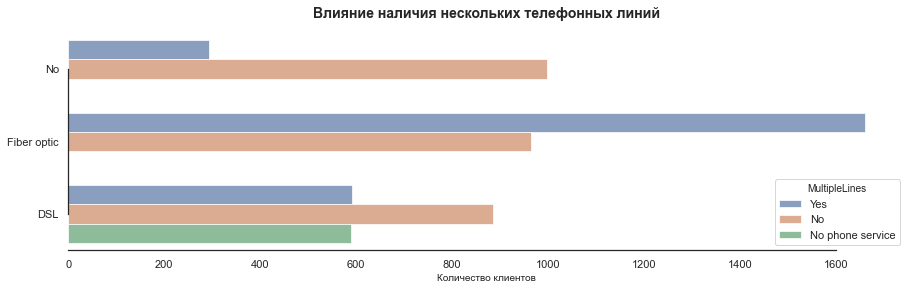

In [18]:
plt.subplots(figsize=(15, 4))
sns.barplot(x='count', hue='MultipleLines', y='InternetService', data=data, alpha=0.7, estimator=sum)
sns.despine(offset=0, trim=True)
plt.xlabel('Количество клиентов', fontsize=10)
plt.ylabel('', fontsize=10)
plt.title(f'Влияние наличия нескольких телефонных линий', fontsize=14, pad=15, fontweight='bold')
plt.show()

У клиентов подключенных к интернет-провайдеру **Fiber optic** большая доля пользуется несколькими телефонными линиями.

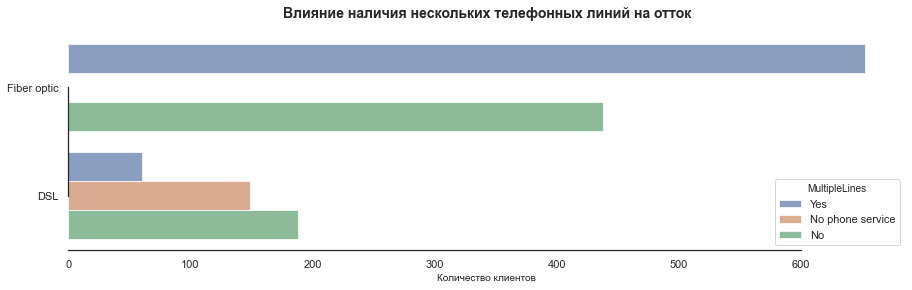

In [19]:
plt.subplots(figsize=(15, 4))
sns.barplot(x='count', hue='MultipleLines', y='InternetService', data=data_fiber_churned, alpha=0.7, estimator=sum)
sns.despine(offset=0, trim=True)
plt.xlabel('Количество клиентов', fontsize=10)
plt.ylabel('', fontsize=10)
plt.title(f'Влияние наличия нескольких телефонных линий на отток', fontsize=14, pad=15, fontweight='bold')
plt.show()

Предположу, что клиенты **fiber optic** активные пользователи интернета, 
и возможно они не хотят пользовать услугами телефонной связи, но скорее всего у них нет такой опции. <br>
Принимая во внимание высокую стоимость абонентской платы, считаю, что пользователи ищут альтернативные варианты.

### 2.6. Влияние социальных факторов на отток.

In [20]:
data['SeniorCitizen'] = data['SeniorCitizen'].map({1 : 'Yes', 0: 'No'})

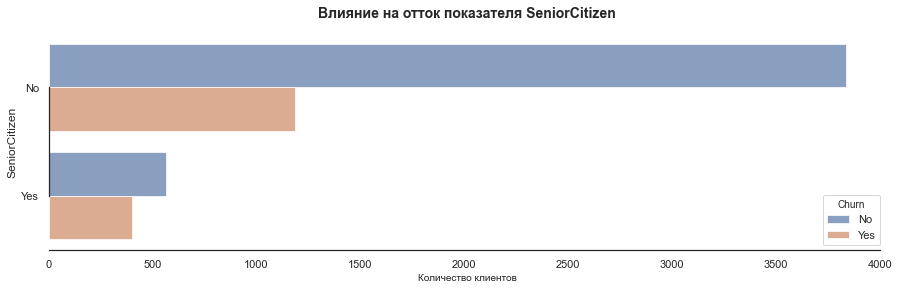

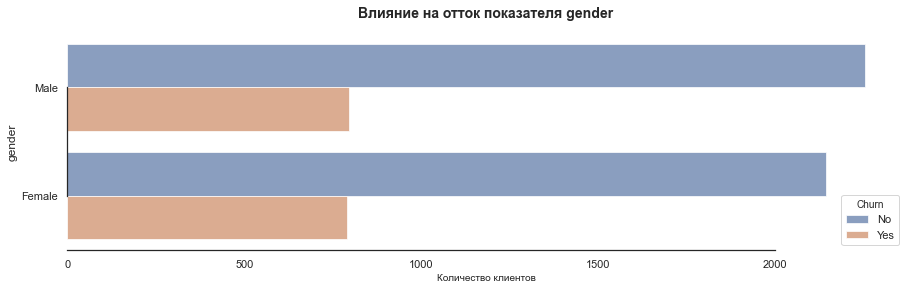

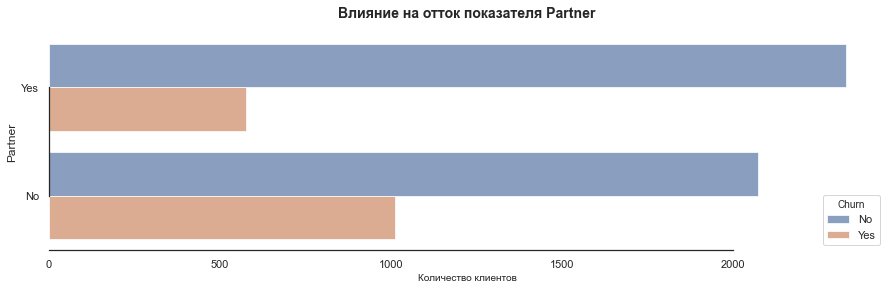

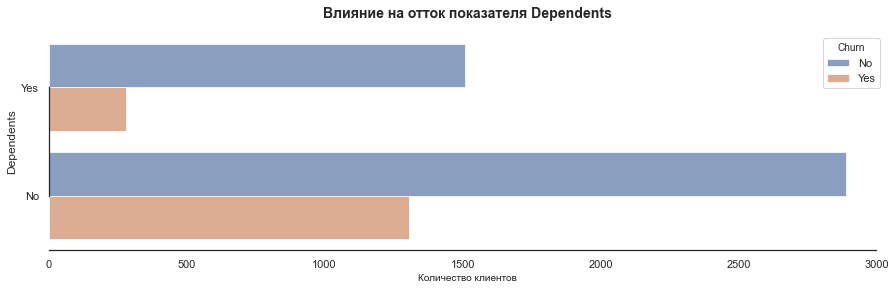

In [21]:
social = ['SeniorCitizen', 'gender', 'Partner', 'Dependents']
for soc in social:
    plt.subplots(figsize=(15, 4))
    
    sns.barplot(x='count', y=soc, hue='Churn', data=data, alpha=0.7, estimator=sum)
    sns.despine(offset=0, trim=True)
    plt.xlabel('Количество клиентов', fontsize=10)
    plt.title(f'Влияние на отток показателя {soc}', fontsize=14, pad=15, fontweight='bold')
    plt.show()

Среди социальных признаков, таких как замужество, пол, наличие детей и статус пенсионера, явных зависимостей не обнаружено. 

***

# 3. Построение моделей для прогнозирования оттока

**Построение модели:**
<br>
* Подготовка данных. Разметим датафрейм, приведем текстовые метрики к числовым значениям.
* Отберем фичи.
* Выберем метрику по которой будем оценивать качество модели.
* Подберем алгоритм классификации.

***

### 3.1. Подготовка данных.

In [22]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import (roc_auc_score, accuracy_score, recall_score, 
                             precision_score, precision_recall_fscore_support, 
                             classification_report, confusion_matrix, plot_confusion_matrix)
from sklearn.metrics import roc_curve, auc

from sklearn.feature_selection import RFE, RFECV, chi2, SelectKBest
from sklearn.decomposition import PCA

import xgboost as xgb

from sklearn import tree import graphviz

Приведем фичи к числовым значениям.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   object 
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [24]:
# Сохраним неразмеченный вариант данных
data_copy = data.copy()

# Целевую переменную также разметим как 1-Yes, 0-No
data['Churn'] = data['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

# Удаляем из основного фрейма целевое значение и ID
data = data.drop(columns=['customerID', 'count'])

# Разметим датафрейм
data = pd.get_dummies(data)

In [25]:
# Разделем данные на фичи и целевую переменную
del_feature = ['OnlineSecurity_No internet service', 
            'OnlineBackup_No internet service', 'DeviceProtection_No internet service',
            'TechSupport_No internet service', 'StreamingTV_No internet service', 
            'MultipleLines_No phone service', 'StreamingMovies_No internet service']

data = data.drop(columns=del_feature)

In [26]:
total_count = data_copy['Churn'].count()
No_count = data_copy[data_copy['Churn'] == 'No']['Churn'].count()
Yes_count = data_copy[data_copy['Churn'] == 'Yes']['Churn'].count()
w = No_count / Yes_count
w

2.7718966603654693

***

### 3.2. Определение фичей.

Отбросим метрики для визуализации, у которых незначительная корреляция с показателем оттока.

In [27]:
# Зададим модуль порогового значения корреляции
min_cor = 0.2

data_cor = data.corr()

# Создадим список метрик, которые отбросим из фичей
drop_list = data_cor[(data_cor['Churn'] <= min_cor) & (data_cor['Churn'] >= -min_cor)].index.to_list()
drop_list_heatmap = drop_list
drop_list = drop_list + ['Churn']

<br>
Построим тепловую карту с коэффициентами корреляции Пирсона


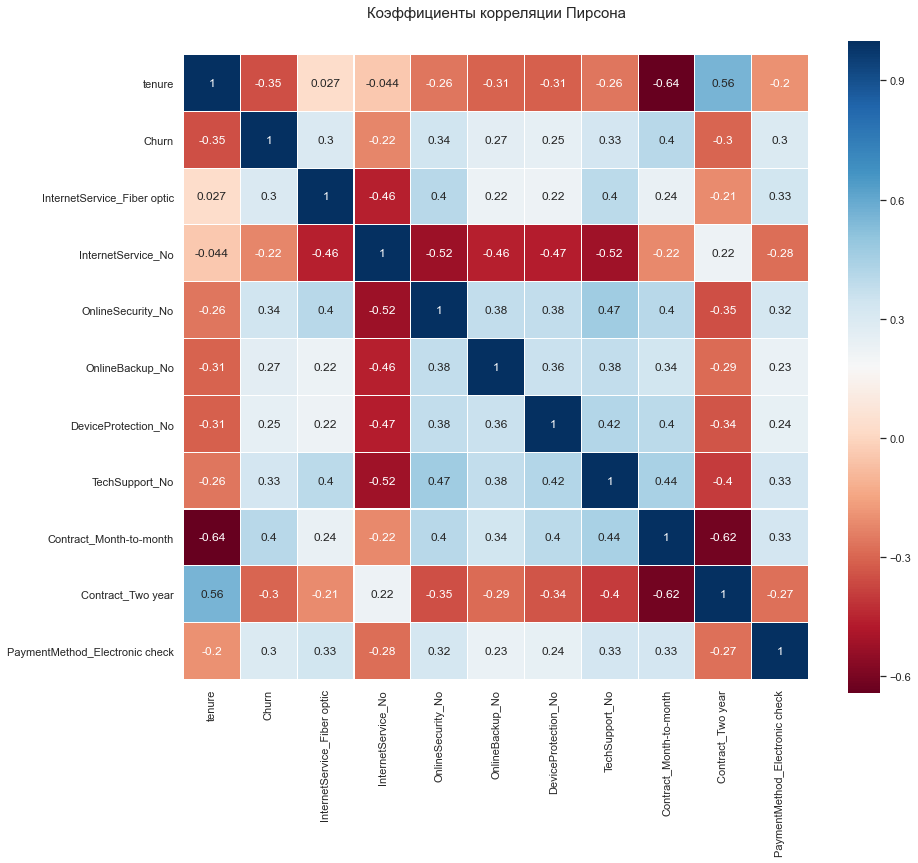

In [28]:
# Выведем только те признаки, кореляция по которым выше порогового значения min_cor
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Коэффициенты корреляции Пирсона', y=1.05, size=15)
sns.heatmap(data.drop(columns=drop_list_heatmap).corr(), 
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', annot=True)
plt.show()

Мы не видим яркой прямой зависимости на показатель оттока.<br>
Также не наблюдается сильной мультиколлинеарности.

***

### 3.3. Подбор метрики

В качестве основной метрики оценки модели будем использовать **Recall** (полноту).
Так как нам важно уловить как можно больше клиентов, которые могут перестать пользоваться услугами компании.

#### Recall (Полнота)

Полнота - показатель, который говорит, какая доля людей была верно определена как переставших пользоваться услугами, но при этом были те, кто ошибочно был определен к оттоку. 
В нашем датафрейме:
1 - Positiv (отток произошел)
0 - Negativ (оттока не было)

![](https://248006.selcdn.ru/public/DS_Block2_M6_final/recall.png)

Определяется формулой:

$$
Recall = \frac{TP}{TP + FN}
$$

* TP - люди, которые действительно ушли от услуг компании;
* FN - люди по которым произошел отток, но ошибочно отнесенные к категории Negativ (оттока не произошло). <br>
То есть нам нужно уменьшать FN.

***

### 3.4. Выбор признаков и построение моделей.

<br>
Разобьем данные на целевые показатели и тестовую и валидационную выборки.
Отмасштабируем данные, чтобы избавится от влияния количественного значения показателей.
<br>

In [29]:
Y = data[['Churn']].values

features = data.drop(columns=['Churn'])

X = features.values
# Разделим на целевую и тренировочную выборку
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=17)

# Отмасштабируем признаки
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
x_test = sc.transform(x_test)

### 3.4.1. Логистическая регрессия
<br>
Логистическая регрессия является одним из статистических методов классификации с использованием линейного дискриминанта Фишера.<br>
<br>
В методе логистической регрессии не производится предсказание значения числовой переменной исходя из выборки исходных значений. Вместо этого, значением функции является вероятность того, что данное исходное значение принадлежит к определенному классу.
<br>

**Проверим признаки**
<br>
<br>Проверим вес признаков и их влияние на метрики.

In [30]:
print(f'Текущее количество признаков - {X.shape[1]}')

Текущее количество признаков - 39


<br>
Настроим модель линейной регрессии. <br>
Так как наш датафрейм несбалансирован, установим параметр class_weight='balanced'. <br>
Подберем параметры используя пятикратную кросс-валидацию. <br>
<br>

In [31]:
skf = StratifiedKFold(n_splits=5, random_state=17)
lr_params = {'C': np.arange(0.7, 1, 0.1)}

lr = LogisticRegression(max_iter=100, class_weight='balanced', solver='lbfgs', random_state=17)
lr_grid = GridSearchCV(lr, lr_params, cv=skf)
lr_model = lr_grid.fit(X_train, Y_train)
lr_best_params = lr_model.best_params_
lr_best_params

{'C': 0.7}

In [32]:
# Метрики оценки качества
scor = ['recall', 'roc_auc', 'accuracy', 'precision']

<br>
У нас есть модель, теперь выберем для этой модели фичи.<br>
Передадим в RFECV модель и обучим на тренировочной выборке.<br>
Выберем несколько метрик для поиска взаимосвязи и оптимальных параметров.<br>
<br>

In [33]:
# Функция по выбору фич взависимости от метрик
def feature_choice(scor):
    rfe = RFECV(lr, min_features_to_select=1, cv=skf, scoring=scor)
    selector = rfe.fit(X_train, Y_train)

    print(f'*******************{scor}*******************')
    print(f'Лучшее количество признаков по метрике {scor} - {selector.n_features_}')

    return selector

In [34]:
# Найдем лучшие признаки для каждой метрики
scor_mtrx = np.empty((X.shape[1], len(scor)))
support_history = []

for n, element in enumerate(scor):
    selector = feature_choice(scor=element)
    scor_mtrx[:, n] = selector.grid_scores_
    support_history.append(selector.support_)

*******************recall*******************
Лучшее количество признаков по метрике recall - 5
*******************roc_auc*******************
Лучшее количество признаков по метрике roc_auc - 33
*******************accuracy*******************
Лучшее количество признаков по метрике accuracy - 20
*******************precision*******************
Лучшее количество признаков по метрике precision - 20


<br>
Так как мы рассматриваем основную метрику *Recall* то выведем наиболее влияющие на эту метрику признаки. И попробуем сделать отдельный прогноз по ним. Сравним с вариантом использование всех фичей.<br>
<br>

In [35]:
# Список лучших фич по recall
best_recall_features = (np.array(features.columns) * support_history[0]).tolist()
best_recall_features  = [x for x in best_recall_features if x != '']
best_recall_features

['tenure',
 'TotalCharges',
 'InternetService_Fiber optic',
 'Contract_Month-to-month',
 'Contract_Two year']

<br>
Мы изучали влияние признаков на *train* сете, стоит осмотреть их визуально.<br>
Отобразим полученные значения метрик для разного количества признаков.<br>
<br>

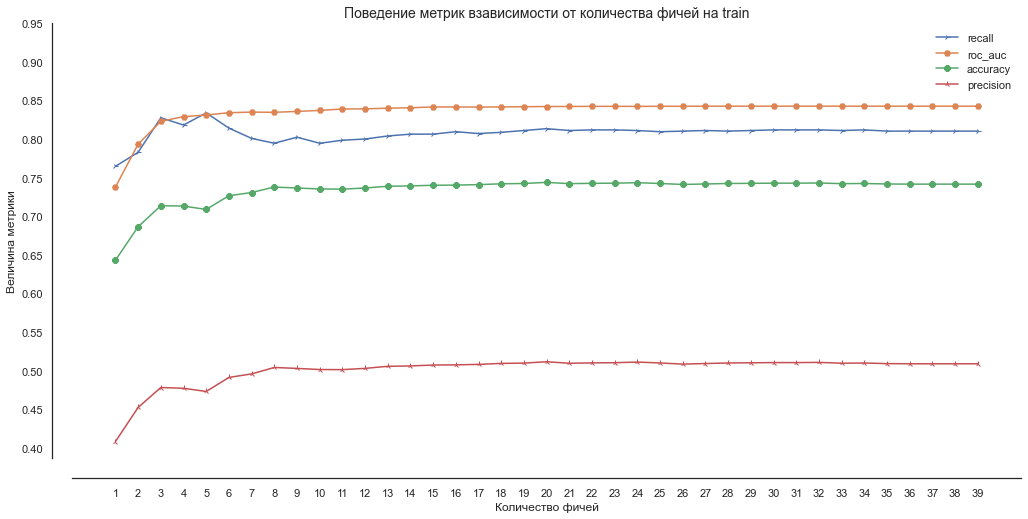

In [36]:
# Список маркеров
m = ['.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']

plt.subplots(figsize=(17,8))
plt.title('Поведение метрик взависимости от количества фичей на train', fontsize=14)


plt.plot(np.arange(1, X.shape[1]+1, 1), scor_mtrx[:,0], marker=f"{random.choice(m)}")
plt.plot(np.arange(1, X.shape[1]+1, 1), scor_mtrx[:,1], marker=f"{random.choice(m)}")
plt.plot(np.arange(1, X.shape[1]+1, 1), scor_mtrx[:,2], marker=f"{random.choice(m)}")
plt.plot(np.arange(1, X.shape[1]+1, 1), scor_mtrx[:,3], marker=f"{random.choice(m)}")

sns.despine(offset=20, trim=False)
plt.ylabel('Величина метрики', fontsize=12)
plt.xlabel('Количество фичей', fontsize=12)
plt.xticks(ticks=np.arange(1, X.shape[1]+1, 1))
plt.yticks(np.arange(0.4, 1, 0.05))
plt.legend(scor, frameon=False)
plt.show()

Наиболее точное предсказание по метрике *Recall* мы получаем используя 5 признаков, 
но в тоже время мы получаем слишком низкую метрику *Precision*.
То есть слишком много клиентов ложно определяются к оттоку. <br>

**Посмотрим, как распределились веса между признаков**

In [37]:
lr_model = lr.fit(X_train, Y_train)

weights_feature = pd.Series(lr_model.coef_[0], index=features.columns.values)
weights_feature = weights_feature.sort_values(ascending=False)
weights_feature

TotalCharges                               0.651473
Contract_Month-to-month                    0.369999
InternetService_Fiber optic                0.230202
OnlineSecurity_No                          0.153359
TechSupport_No                             0.111783
StreamingMovies_Yes                        0.109491
PaymentMethod_Electronic check             0.106719
StreamingTV_Yes                            0.104616
OnlineBackup_No                            0.083491
PaperlessBilling_Yes                       0.080067
DeviceProtection_No                        0.071240
PhoneService_No                            0.061649
Dependents_No                              0.034622
SeniorCitizen_Yes                          0.033275
MultipleLines_Yes                          0.030234
DeviceProtection_Yes                       0.016209
Partner_Yes                                0.011706
gender_Female                              0.007097
OnlineBackup_Yes                           0.003415
gender_Male 

#### Прогноз по всем фичам.


У нас есть модель, которая показала хорошие результаты на *train*, попробуем сделать прогноз на отложенной выборке.<br>
Используем все фичи и посмотрим на результаты.
<br>

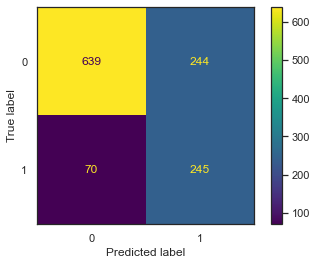

In [38]:
predicted_lr = lr_model.predict(x_test)

plot_confusion_matrix(lr_model, x_test, y_test)
plt.show()

In [39]:
print(f'Recall -    {round(recall_score(y_test, predicted_lr), 4)}')
print(f'Precision - {round(precision_score(y_test, predicted_lr), 4)}')
print(f'Roc_auc -   {round(roc_auc_score(y_test, predicted_lr), 4)}')

Recall -    0.7778
Precision - 0.501
Roc_auc -   0.7507


<br>
У нас получились неплохие показатели *Recall* и *Roc_auc*, но мы видим достаточно большое число ложноотрицательных срабатываний.<br>
<br>

**Попробуем улучшить Recall, выберем самые важные фичи**

<br>
Ранее на тестовом датасете лучшие показатели были получены с использованием 5 фичей. <br>
Проверим на тестовой выборке.<br>
<br>

In [40]:
print(best_recall_features)

['tenure', 'TotalCharges', 'InternetService_Fiber optic', 'Contract_Month-to-month', 'Contract_Two year']


In [41]:
X_proba = data[best_recall_features].values
Y_proba = data[['Churn']].values

# Разделим на целевую и тренировочную выборку
X_train_p, x_test_p, Y_train_p, y_test_p = train_test_split(X_proba, Y_proba, test_size=0.2, random_state=17)

In [42]:
lr_params = {'C': np.arange(0.7, 1, 0.1)}

lr_p = LogisticRegression(max_iter=100, class_weight='balanced', solver='lbfgs', random_state=17)
lr_grid_p = GridSearchCV(lr_p, lr_params, cv=skf)
lr_model_p = lr_grid_p.fit(X_train_p, Y_train_p)
lr_best_params_p = lr_model_p.best_params_
lr_best_params_p

{'C': 0.8999999999999999}

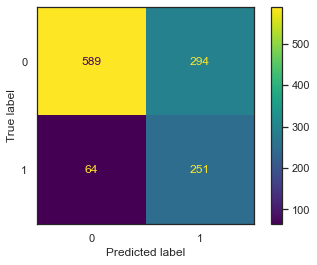

In [43]:
predicted_lr_p = lr_model_p.predict(x_test_p)

plot_confusion_matrix(lr_model_p, x_test_p, y_test_p)
plt.show()

In [44]:
print(f'Recall -    {round(recall_score(y_test_p, predicted_lr_p), 4)}')
print(f'Precision - {round(precision_score(y_test_p, predicted_lr_p), 4)}')
print(f'Roc_auc -   {round(roc_auc_score(y_test_p, predicted_lr_p), 4)}')

Recall -    0.7968
Precision - 0.4606
Roc_auc -   0.7319


<br>
Мы улучшили *Recall*, но метрики *Roc_auc* и *Precision* уменьшились. <br>
<br>

#### Проверим как будут менятся показатели взависимости от веса классов.

Для этого будем изменять вес у класса оттока и записывать показания всех метрик. Используем все фичи.

In [45]:
accuracy_lr_history = []
roc_auc_lr_history = []
recall_lr_history = []
precision_lr_history = []
weight = 0

for i in range(0, 100, 1):
 
    lr = LogisticRegression(max_iter=100, 
                            C=lr_best_params['C'], 
                            class_weight={0:1, 1:0.5+weight}, 
                            solver='lbfgs', 
                            random_state=17)
    
    lr_model = lr.fit(X_train, Y_train)
    predicted_lr = lr_model.predict(x_test)
    
    accuracy_lr_history.append(accuracy_score(y_test, predicted_lr))
    roc_auc_lr_history.append(roc_auc_score(y_test, predicted_lr))
    recall_lr_history.append(recall_score(y_test, predicted_lr))
    precision_lr_history.append(precision_score(y_test, predicted_lr))
    weight += 0.05

Визуализация зависимости от веса.

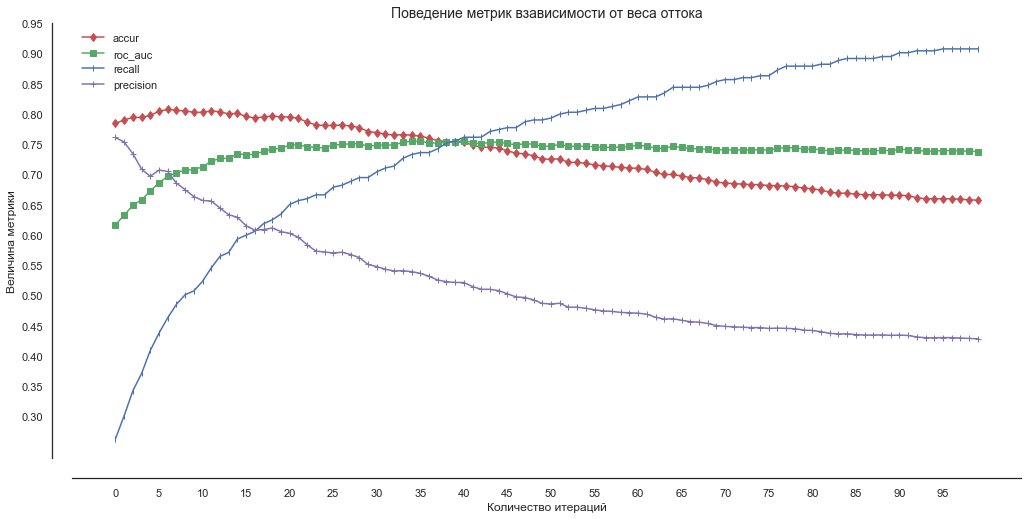

In [46]:
# Список маркеров
m = ['.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']

plt.subplots(figsize=(17,8))
plt.title('Поведение метрик взависимости от веса оттока', fontsize=14)


plt.plot(np.arange(0, 100, 1), accuracy_lr_history, marker=f"{random.choice(m)}", color='r')
plt.plot(np.arange(0, 100, 1), roc_auc_lr_history, marker=f"{random.choice(m)}", color='g')
plt.plot(np.arange(0, 100, 1), recall_lr_history, marker=f"{random.choice(m)}", color='b')
plt.plot(np.arange(0, 100, 1), precision_lr_history, marker=f"{random.choice(m)}", color='m')

sns.despine(offset=20, trim=False)
plt.ylabel('Величина метрики', fontsize=12)
plt.xlabel('Количество итераций', fontsize=12)
plt.xticks(ticks=np.arange(0, 100, 5))
plt.yticks(np.arange(0.3, 1, 0.05))
plt.legend(['accur', 'roc_auc', 'recall', 'precision'], frameon=False)
plt.show()

Настроим модель на вес, соответствующий пересечению Recall и Roc_auc.<br> 
Ориентировочно на 40 итерации мы получаем самый сбалансированный вариант.

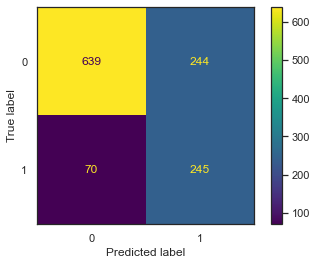

In [47]:
lr = LogisticRegression(max_iter=100, C=lr_best_params['C'], class_weight='balanced', solver='lbfgs', random_state=17)

lr_model = lr.fit(X_train, Y_train)

predicted_lr = lr_model.predict(x_test)
save_lr = np.copy(predicted_lr)

plot_confusion_matrix(lr_model, x_test, y_test)
plt.show()

In [48]:
print(f'Recall -    {round(recall_score(y_test, predicted_lr), 4)}')
print(f'Precision - {round(precision_score(y_test, predicted_lr), 4)}')
print(f'Roc_auc -   {round(roc_auc_score(y_test, predicted_lr), 4)}')

Recall -    0.7778
Precision - 0.501
Roc_auc -   0.7507


<br>
Мы настроили логистическую регрессию. Получили неплохие результаты по метрикам *Recall* и *Roc_auc*, но все же имеем большое число ложных срабатываний. Неверного отношения клиентов к оттоку.<br>
Мы можем увеличивать метрику Recall, то есть находить больше уходящих клиентов, но тогда мы увеличиваем количество ложных срабатываний.<br>
<br>

### 3.4.2. XGboost

<br>
Попробуем настроить XGBoost.<br>
XGBoost — алгоритм машинного обучения, основанный на дереве поиска решений и использующий фреймворк 
градиентного бустинга.<br>
<br>

In [49]:
# Маркеры для отрисовки
m = ['.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']

In [50]:
# Название фич сохраним в список
feature_names = features.columns.to_list()

In [51]:
# Создадим функцию модели
def custom_model(X_train, Y_train, x_test, y_test, weight_true_class, feature_names, params, num_rounds):
    weights = np.zeros(len(Y_train))
    weights[Y_train.ravel() == 0] = 1.0
    weights[Y_train.ravel() == 1] = weight_true_class
    
    dtrain = xgb.DMatrix(X_train, Y_train, weight = weights, feature_names=feature_names)
    dtest = xgb.DMatrix(x_test, y_test, feature_names=feature_names)
    
    num_rounds = num_rounds

    xgb_model = xgb.train(params, dtrain, num_rounds)
    xgb_pred = xgb_model.predict(dtest)
    xgb_pred_bool = np.where(xgb_pred >= 0.50, 1, 0)
    return xgb_model, xgb_pred_bool

In [52]:
# Запустим базовую модель
params = {'objective': 'reg:pseudohubererror', 'max_depth': 6, 'eta': 0.3, 'validate_parameters' : True,
          'subsample' : 1, 'sampling_method' : 'gradient_based', 'eval_metric' : 'auc'}

xgb_model = custom_model(X_train=X_train, Y_train=Y_train, x_test=x_test, y_test=y_test, 
              weight_true_class=1, feature_names=feature_names, params=params, num_rounds=10)

Влияние признаков на модель.

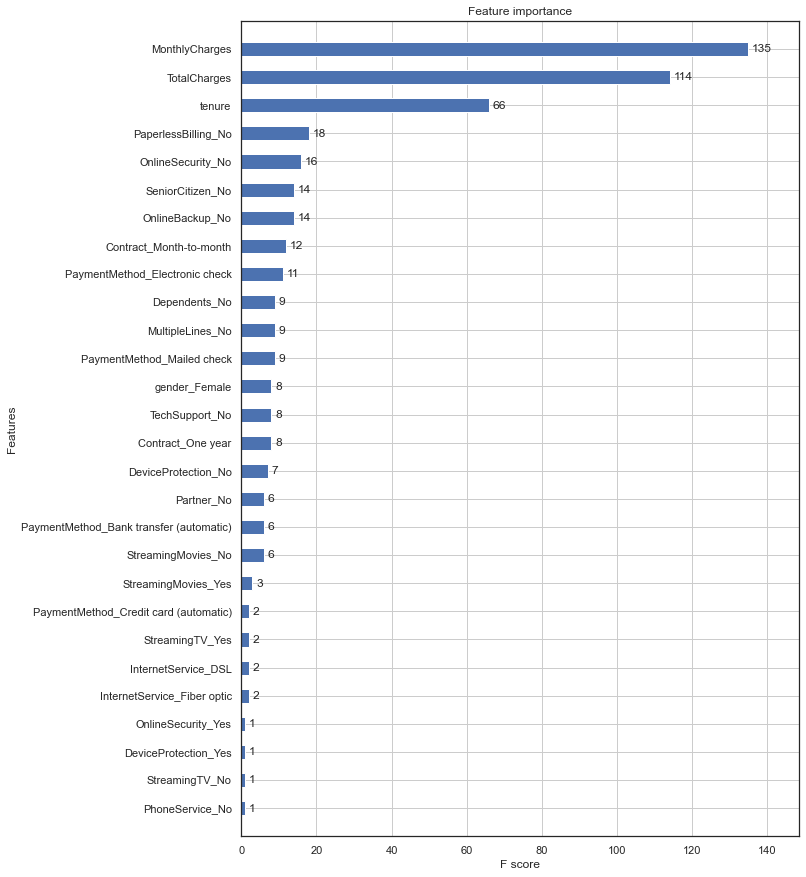

In [53]:
# Выведем значимые фичи
fig, ax = plt.subplots(1,1,figsize=(10,15))
xgb.plot_importance(xgb_model[0], height=0.5, ax=ax)
plt.show()

**Влияние веса классов на метрики.**

In [54]:
roc_auc_xgb_history = []
recall_xgb_history = []
precision_xgb_history = []
a = 0

for i in range(1, 50, 1):
    params = {'objective': 'reg:pseudohubererror', 'max_depth': 6, 'eta': 0.3, 'sampling_method' : 'uniform',
              'alpha' : 0.3, 'grow_policy' : 'lossguide', 'eval_metric' : 'auc'}

    xgb_model, predict_xgb = custom_model(X_train=X_train, Y_train=Y_train, x_test=x_test, y_test=y_test, 
                                     weight_true_class=0.1+a, feature_names=feature_names, params=params, num_rounds=10)
    
    precision_xgb_history.append(precision_score(y_test, predict_xgb))
    recall_xgb_history.append(recall_score(y_test, predict_xgb))
    roc_auc_xgb_history.append(roc_auc_score(y_test, predict_xgb))
    a += 0.1

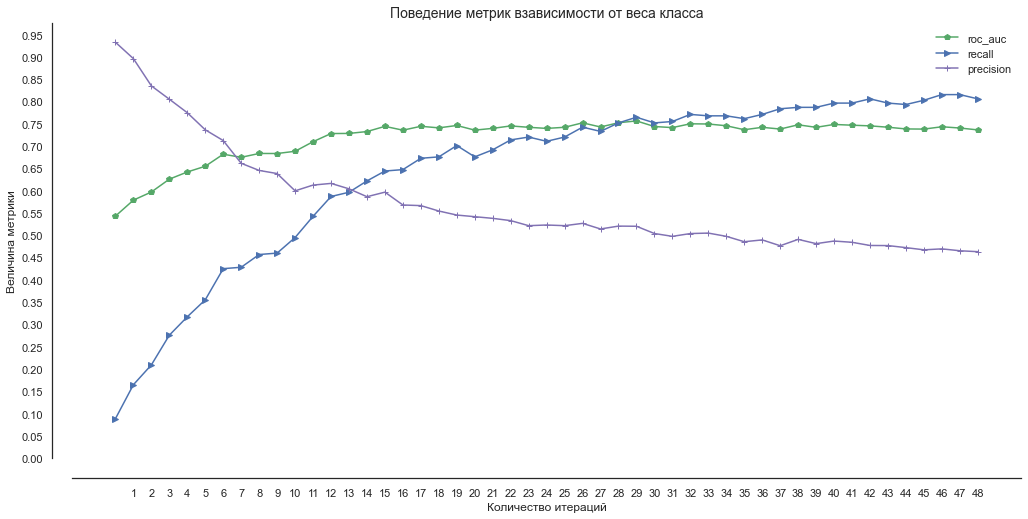

In [55]:
plt.subplots(figsize=(17,8))
plt.title('Поведение метрик взависимости от веса класса', fontsize=14)

plt.plot(np.arange(0, len(roc_auc_xgb_history), 1), roc_auc_xgb_history, marker=f"{random.choice(m)}", color='g')
plt.plot(np.arange(0, len(roc_auc_xgb_history), 1), recall_xgb_history, marker=f"{random.choice(m)}", color='b')
plt.plot(np.arange(0, len(roc_auc_xgb_history), 1), precision_xgb_history, marker=f"{random.choice(m)}", color='m')

sns.despine(offset=20, trim=False)
plt.ylabel('Величина метрики', fontsize=12)
plt.xlabel('Количество итераций', fontsize=12)
plt.xticks(ticks=np.arange(1, len(roc_auc_xgb_history), 1))
plt.yticks(np.arange(0, 1, 0.05))
plt.legend(['roc_auc', 'recall', 'precision'], frameon=False)
plt.show()

Выберем вес класса оттока, соответсьвующий 25-ой итерации

**Влияние количества trees на метрики.**

In [56]:
roc_auc_xgb_history = []
recall_xgb_history = []
precision_xgb_history = []

for i in range(1, 50, 1):
    params = {'objective': 'reg:pseudohubererror', 'max_depth': 6, 'eta': 0.3, 'sampling_method' : 'uniform',
              'alpha' : 0.3, 'grow_policy' : 'lossguide', 'eval_metric' : 'auc'}

    xgb_model, predict_xgb = custom_model(X_train=X_train, Y_train=Y_train, x_test=x_test, y_test=y_test, 
                                          weight_true_class=2.5, feature_names=feature_names, params=params, num_rounds=i)
    
    precision_xgb_history.append(precision_score(y_test, predict_xgb))
    recall_xgb_history.append(recall_score(y_test, predict_xgb))
    roc_auc_xgb_history.append(roc_auc_score(y_test, predict_xgb))

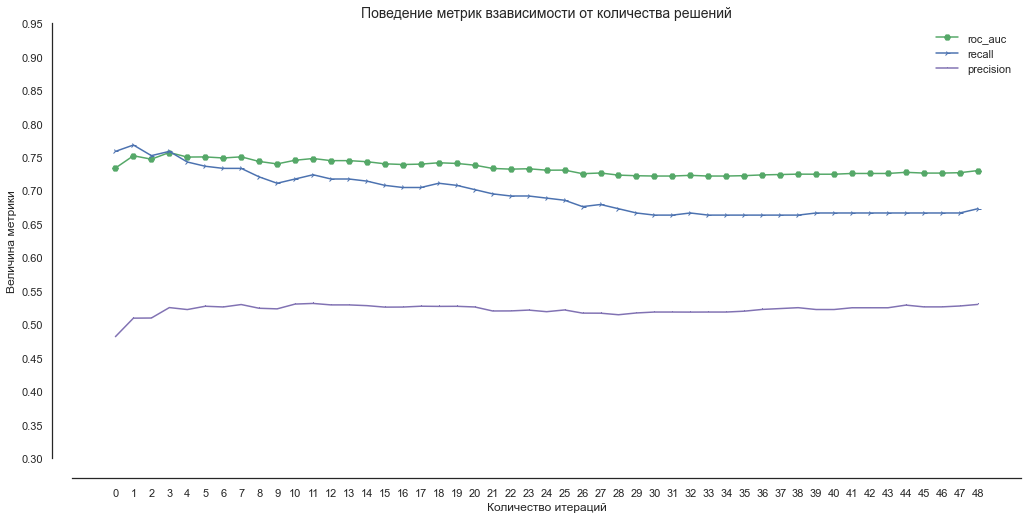

In [57]:
plt.subplots(figsize=(17,8))
plt.title('Поведение метрик взависимости от количества решений', fontsize=14)

plt.plot(np.arange(0, len(roc_auc_xgb_history), 1), roc_auc_xgb_history, marker=f"{random.choice(m)}", color='g')
plt.plot(np.arange(0, len(roc_auc_xgb_history), 1), recall_xgb_history, marker=f"{random.choice(m)}", color='b')
plt.plot(np.arange(0, len(roc_auc_xgb_history), 1), precision_xgb_history, marker=f"{random.choice(m)}", color='m')

sns.despine(offset=20, trim=False)
plt.ylabel('Величина метрики', fontsize=12)
plt.xlabel('Количество итераций', fontsize=12)
plt.xticks(ticks=np.arange(0, len(roc_auc_xgb_history), 1))
plt.yticks(np.arange(0.3, 1, 0.05))
plt.legend(['roc_auc', 'recall', 'precision'], frameon=False)
plt.show()

Количество деревьев решений оптимально в диапазоне от 3-6, при увеличении количества, мы теряем качество модели.

**Влияние глубины решающих деревьев на метрики.**

In [58]:
roc_auc_xgb_history = []
recall_xgb_history = []
precision_xgb_history = []

for i in range(1, 40, 1):
    params = {'objective': 'reg:pseudohubererror', 'max_depth': i, 'eta': 0.3, 'sampling_method' : 'uniform',
              'alpha' : 0.3, 'grow_policy' : 'lossguide', 'eval_metric' : 'auc'}

    xgb_model, predict_xgb = custom_model(X_train=X_train, Y_train=Y_train, x_test=x_test, y_test=y_test, 
                                          weight_true_class=2.5, feature_names=feature_names, params=params, num_rounds=8)
    
    precision_xgb_history.append(precision_score(y_test, predict_xgb))
    recall_xgb_history.append(recall_score(y_test, predict_xgb))
    roc_auc_xgb_history.append(roc_auc_score(y_test, predict_xgb))

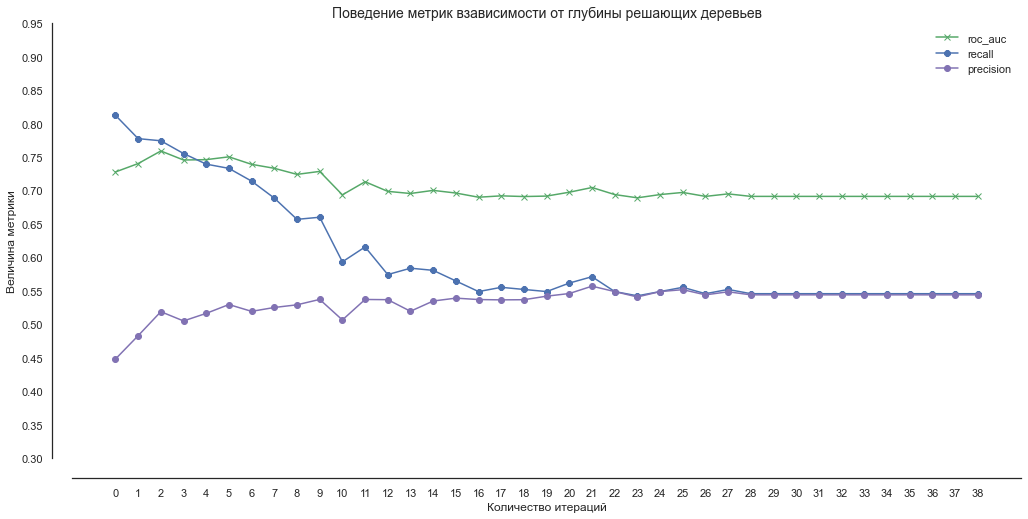

In [59]:
plt.subplots(figsize=(17,8))
plt.title('Поведение метрик взависимости от глубины решающих деревьев', fontsize=14)

plt.plot(np.arange(0, len(roc_auc_xgb_history), 1), roc_auc_xgb_history, marker=f"{random.choice(m)}", color='g')
plt.plot(np.arange(0, len(roc_auc_xgb_history), 1), recall_xgb_history, marker=f"{random.choice(m)}", color='b')
plt.plot(np.arange(0, len(roc_auc_xgb_history), 1), precision_xgb_history, marker=f"{random.choice(m)}", color='m')

sns.despine(offset=20, trim=False)
plt.ylabel('Величина метрики', fontsize=12)
plt.xlabel('Количество итераций', fontsize=12)
plt.xticks(ticks=np.arange(0, len(roc_auc_xgb_history), 1))
plt.yticks(np.arange(0.3, 1, 0.05))
plt.legend(['roc_auc', 'recall', 'precision'], frameon=False)
plt.show()

Оптимальное соотношение метрик при параметре *max_depth=3*

In [60]:
params = {'objective': 'reg:pseudohubererror', 'max_depth': 3, 'eta': 0.3, 'sampling_method' : 'uniform',
              'alpha' : 0.3, 'grow_policy' : 'lossguide', 'eval_metric' : 'auc'}

xgb_model, predict_xgb = custom_model(X_train=X_train, Y_train=Y_train, x_test=x_test, y_test=y_test, 
                                          weight_true_class=w, feature_names=feature_names, params=params, num_rounds=8)

print(f'Recall -    {round(recall_score(y_test, predict_xgb), 4)}')
print(f'Precision - {round(precision_score(y_test, predict_xgb), 4)}')
print(f'Roc_auc -   {round(roc_auc_score(y_test, predict_xgb), 4)}')

print(confusion_matrix(y_test, predict_xgb))

Recall -    0.8127
Precision - 0.502
Roc_auc -   0.7625
[[629 254]
 [ 59 256]]


XG boost показал  результат немного лучший результат чем логистическая регрессия.

### 3.4.3. RandomForestClassifier

Рассмотрим другой вид классификатора - случайный лес. <br>
Случайный лес является мета-оценкой, которая соответствует ряду классификаторов дерева решений на разных подпакетах набора данных и использует усреднение для улучшения точности прогнозирования и контроля над переобучением.<br>
<br>

In [82]:
# Настроим модель, подберем параметры с помощью GridSearch с 5-ти кратной кросс-валидацией
rfc_params = {'n_estimators': range(10, 40, 5), # RandomForestClassifier
              'criterion' : ['gini'],
              'min_samples_leaf': range(1, 5, 1),
              'max_depth': range(5, 10, 1),
              'class_weight' : ['balanced'],             
              }


skf = StratifiedKFold(n_splits=5, random_state=17)

rfc = RandomForestClassifier(random_state=17)
rfc_grid = GridSearchCV(rfc, rfc_params, cv=skf)
rfc_model = rfc_grid.fit(X_train, Y_train)

rfc_best_params = rfc_model.best_params_
rfc_best_params

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'n_estimators': 25}

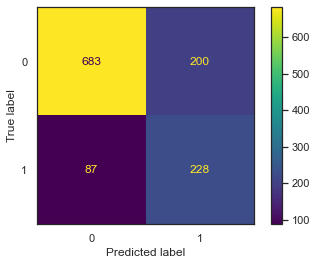

In [83]:
predicted_rfc = rfc_model.predict(x_test)

plot_confusion_matrix(rfc_model, x_test, y_test)
plt.show()

In [84]:
print(f'Recall -    {round(recall_score(y_test, predicted_rfc), 4)}')
print(f'Precision - {round(precision_score(y_test, predicted_rfc), 4)}')
print(f'Roc_auc -   {round(roc_auc_score(y_test, predicted_rfc), 4)}')

Recall -    0.7238
Precision - 0.5327
Roc_auc -   0.7487


### 3.4.4. SVC

Метод опорных векторов (SVM – Support vector machines) использует гиперплоскость, чтобы классифицировать данные по 2 классам. На верхнем уровне SVM выполняет те же операции, что и C4.5, но с одним отличием – SVM не использует деревья решений. <br>
<br>

In [64]:
# Настроим модель, подберем параметры с помощью GridSearch с 5-ти кратной кросс-валидацией
svc_params = {'kernel': ['rbf'], # SVC
              'C': np.arange(0.4, 1, 0.1),
              'gamma' : ['scale', 'auto'],
              'decision_function_shape' : ['ovo', 'ovr']
             }

svc = SVC(random_state=17, class_weight='balanced')

svc_grid = GridSearchCV(svc, svc_params, cv=skf)

svc_model = svc_grid.fit(X_train, Y_train)

svc_best_params = svc_model.best_params_
svc_best_params

{'C': 0.8999999999999999,
 'decision_function_shape': 'ovo',
 'gamma': 'auto',
 'kernel': 'rbf'}

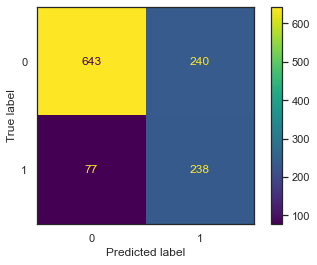

In [65]:
predicted_svc = svc_model.predict(x_test)

plot_confusion_matrix(svc_model, x_test, y_test)
plt.show()

In [66]:
print(f'Recall -    {round(recall_score(y_test, predicted_svc), 4)}')
print(f'Precision - {round(precision_score(y_test, predicted_svc), 4)}')
print(f'Roc_auc -   {round(roc_auc_score(y_test, predicted_svc), 4)}')

Recall -    0.7556
Precision - 0.4979
Roc_auc -   0.7419


### 3.4.5. DecisionTreeClassifier

Алгоритм DecisionTreeClassifier.

In [93]:
# Настроим модель, подберем параметры с помощью GridSearch с 5-ти кратной кросс-валидацией
dtc_params = {'criterion' : ['gini', 'entropy'],
              'min_samples_leaf': range(3, 10, 1),
              'max_depth': range(3, 10, 1),
              'max_features' :['sqrt', 'log2'],
              'class_weight' : ['balanced'],
              'splitter' : ['best'],
              'min_samples_split' : range(1, 5, 1),
              }

In [94]:
dtc = DecisionTreeClassifier(random_state=17)

dtc_grid = GridSearchCV(dtc, dtc_params, cv=skf)

dtc_model = dtc_grid.fit(X_train, Y_train)

dtc_best_params = dtc_model.best_params_
dtc_best_params

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

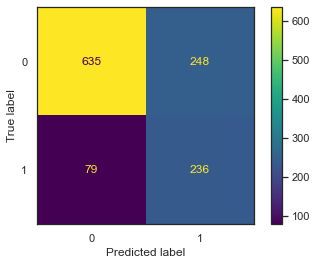

In [95]:
predicted_dtc = dtc_model.predict(x_test)

plot_confusion_matrix(dtc_model, x_test, y_test)
plt.show()

In [96]:
print(f'Recall -    {round(recall_score(y_test, predicted_dtc), 4)}')
print(f'Precision - {round(precision_score(y_test, predicted_dtc), 4)}')
print(f'Roc_auc -   {round(roc_auc_score(y_test, predicted_dtc), 4)}')

Recall -    0.7492
Precision - 0.4876
Roc_auc -   0.7342


Отобразим дерево решений.

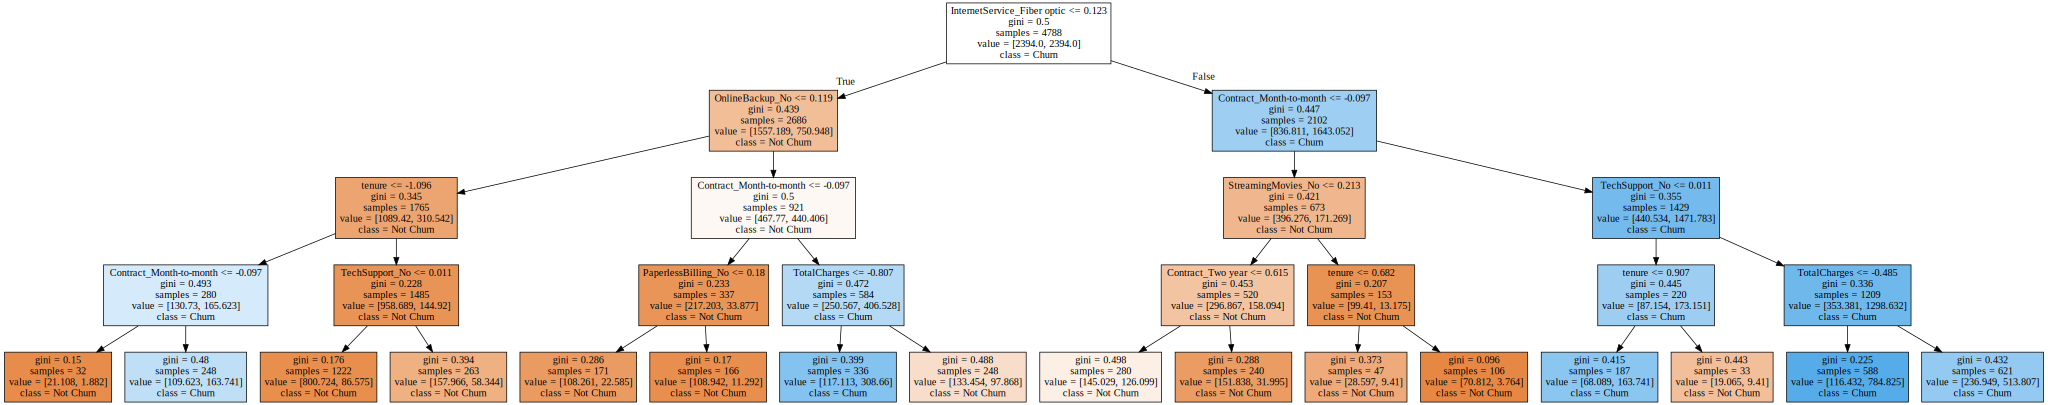

In [97]:
dot_data = tree.export_graphviz(dtc_model.best_estimator_, out_file=None,
                                    feature_names=data.drop(columns=['Churn']).columns.to_list(),  
                                    class_names={1 : "Churn", 0 : 'Not Churn'},  
                                    filled=True)  
graphviz.Source(dot_data)

Итак, у нас есть 5 обученных моделей. Подберем лучшую модель.

# 4. Сравнение качества моделей 

Сравним метрики по всем моделям.

In [132]:
models = [lr_model, rfc_model, svc_model, xgb_model, dtc_model]

mtrx = np.empty((3, len(models)))
n  = 0     

for model in models:
    if model == xgb_model:
        xgb_model, predict_xgb = custom_model(X_train=X_train, Y_train=Y_train, x_test=x_test, y_test=y_test, 
                                        weight_true_class=w, feature_names=feature_names, params=params, num_rounds=8)
        scores = np.array([recall_score(y_test, predict_xgb), 
                           precision_score(y_test, predict_xgb), 
                           roc_auc_score(y_test, predict_xgb)])
        mtrx[:, n] = scores
        n += 1
    else:    
        predict = model.predict(x_test)
        scores = np.array([recall_score(y_test, predict), 
                           precision_score(y_test, predict), 
                           roc_auc_score(y_test, predict)])
        mtrx[:, n] = scores 
        n += 1                                                   

predict_df = pd.DataFrame(mtrx, index=['Recall', 'Precision', 'Roc_auc'], 
                          columns=['LogisticRegression', 'RandomForest', 'SVC', 'XGboost', 'DecisionTree'])

In [133]:
predict_df

,LogisticRegression,RandomForest,SVC,XGboost,DecisionTree
Recall,0.777778,0.723810,0.755556,0.812698,0.749206
Precision,0.501022,0.532710,0.497908,0.501961,0.487603
Roc_auc,0.750724,0.748654,0.741877,0.762521,0.734173


Вывод: лучше всего справился с задачей XGboost, также неплохо показала себя логистическая регрессия.
Тем не менее мы можем варьировать весом класса у любой модели и получать лучшие результаты по метрике Recall.